In [106]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from utils.classifications_utils import *
from utils.data_processing_utils_lin_edit import *
from utils.data_visualization_utils import *
from utils.metrics_utils import *
from utils.grid_search_utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [112]:
level_0_wind = load_data(0, 6, "drone3")
level_0_wind = separate_data_based_on_apparatus(level_0_wind)

level_1_wind = load_data(1, 6, "drone3")
level_1_wind = separate_data_based_on_apparatus(level_1_wind)

level_2_wind = load_data(2, 6, "drone3")
level_2_wind = separate_data_based_on_apparatus(level_2_wind)

# level_3_wind = load_data(3, 3)
# level_3_wind = separate_data_based_on_apparatus(level_3_wind)

In [113]:
acc_no_wind, gyro_no_wind, _, _ = level_0_wind.values()
label_0 = [0 for x in range(acc_no_wind.shape[0])]

acc_level_1_wind, gyro_level_1_wind, _, _ = level_1_wind.values()
label_1 = [1 for x in range(acc_level_1_wind.shape[0])]

acc_level_2_wind, gyro_level_2_wind, _, _ = level_2_wind.values()
label_2 = [2 for x in range(acc_level_2_wind.shape[0])]

# acc_level_6_wind, gyro_level_6_wind, _, _ = level_6_wind.values()
# label_3 = [3 for x in range(acc_level_6_wind.shape[0])]

# acc_level_8_wind, gyro_level_8_wind, _, _ = level_8_wind.values()
# label_4 = [4 for x in range(acc_level_8_wind.shape[0])]

# Visualize data in frequency domain: no wind

In [114]:
from scipy import signal
from utils.reduce_noise_utils import *

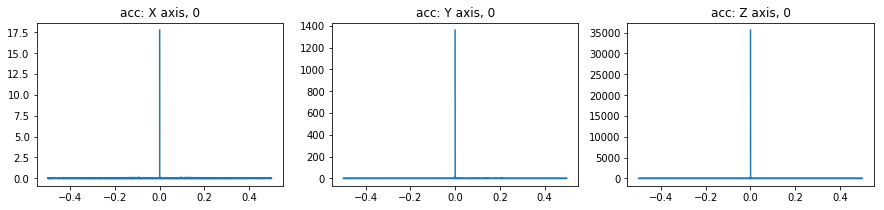

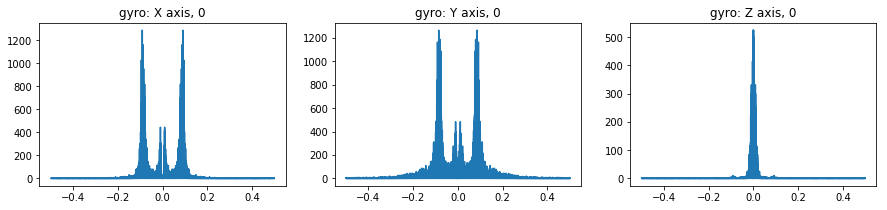

In [115]:
plot_in_frequency_domain(acc_no_wind, 0, 'acc')
plot_in_frequency_domain(gyro_no_wind, 0, 'gyro')

# Reduce noise

In [116]:
gyro_no_wind_reduced = reduce_noise_with_FFT(gyro_no_wind, [100, 300, 200])

# Visualize data in frequency domain: level 1

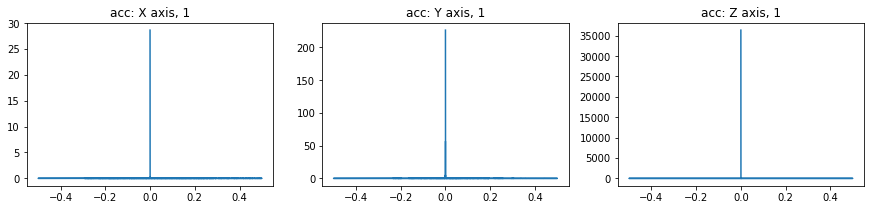

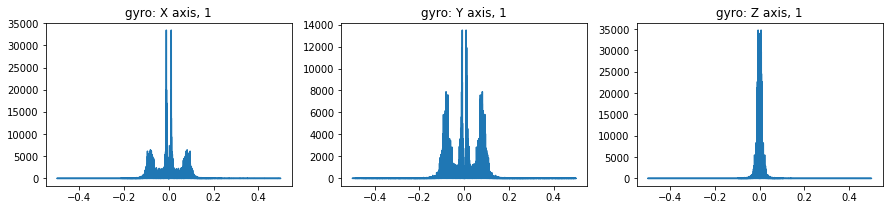

In [117]:
plot_in_frequency_domain(acc_level_1_wind, 1, 'acc')
plot_in_frequency_domain(gyro_level_1_wind, 1, 'gyro')

# Reduce noise

In [118]:
gyro_level_1_reduced = reduce_noise_with_FFT(gyro_level_1_wind, [2500, 5000, 2000])

# Visualize data in frequency domain: level 2

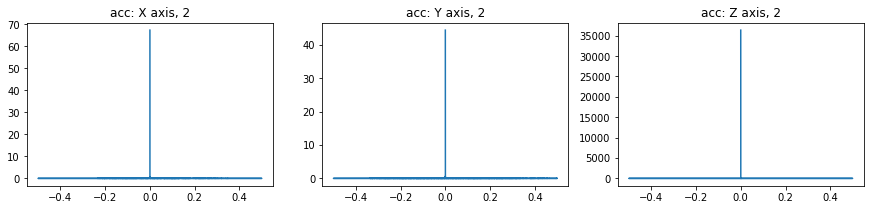

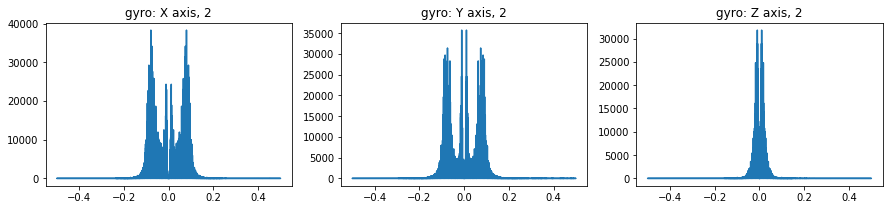

In [119]:
plot_in_frequency_domain(acc_level_2_wind, 2, 'acc')
plot_in_frequency_domain(gyro_level_2_wind, 2, 'gyro')

# Reduce noise

In [120]:
gyro_level_2_reduced = reduce_noise_with_FFT(gyro_level_2_wind, [6000, 2000, 1000])

# Split No Wind Data

In [121]:
X_train_acc_0, X_test_acc_0, y_train_acc_0, y_test_acc_0 = \
train_test_split(acc_no_wind, label_0, test_size=0.2, shuffle=False)

X_train_gyro_0, X_test_gyro_0, y_train_gyro_0, y_test_gyro_0 = \
train_test_split(gyro_no_wind_reduced, label_0, test_size=0.2, shuffle=False)

# Split Level 1 Wind

In [122]:
X_train_acc_1, X_test_acc_1, y_train_acc_1, y_test_acc_1 = \
train_test_split(acc_level_1_wind, label_1, test_size=0.2, shuffle=False)

X_train_gyro_1, X_test_gyro_1, y_train_gyro_1, y_test_gyro_1 = \
train_test_split(gyro_level_1_reduced, label_1, test_size=0.2, shuffle=False)

# Split Level 2 Wind

In [123]:
X_train_acc_2, X_test_acc_2, y_train_acc_2, y_test_acc_2 = \
train_test_split(acc_level_2_wind, label_2, test_size=0.2, shuffle=False)

X_train_gyro_2, X_test_gyro_2, y_train_gyro_2, y_test_gyro_2 = \
train_test_split(gyro_level_2_reduced, label_2, test_size=0.2, shuffle=False)

# Stack data up

# Gyro

In [124]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_2)
y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_2))
display(X_train_gyro.shape)

(85447, 3)

In [126]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_2)
y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_2))

(21363, 3)

# Accelerometer

In [127]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_2)

y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_2))

In [128]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_2)

y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_2))

# Transform and generate features

In [129]:
from transformers.featureGenerator import FeatureGenerator

# Train a random forest classifier and evaluate 

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Classify 0, min and max levels of airflows

# Gyro

# Stack up no wind, level 1 wind and level 2 wind data 

In [147]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_2)

y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_2))

In [148]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_2)

y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_2))

In [149]:
feature_generator_gyro2 = FeatureGenerator(1)
feature_generator_gyro2.fit(X_train_gyro, 3)

FeatureGenerator(sliding_window=1)

In [150]:
X_train_gyro = feature_generator_gyro2.transform(X_train_gyro, 'gyro')
y_train_gyro = reduce_label_amount(y_train_gyro, 3)

28383


In [151]:
feature_generator_gyro_test2 = FeatureGenerator(1)
feature_generator_gyro_test2.fit(X_test_gyro, 3)

FeatureGenerator(sliding_window=1)

In [152]:
X_test_gyro = feature_generator_gyro_test2.transform(X_test_gyro, 'gyro')
y_test_gyro = reduce_label_amount(y_test_gyro, 3)

7022


# Train a random forest classifier and predict

In [184]:
import pickle

In [185]:
clf_gyro2 = RandomForestClassifier(n_estimators=150)
clf_gyro2.fit(X_train_gyro, y_train_gyro)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
pickle.dump(clf_gyro2, open("randomforest_gyro2.sav", 'wb'))

In [154]:
y_pred_gyro = clf_gyro2.predict(X_test_gyro)

# Confusion Matrix: Gyro

In [155]:
get_confusion_matrix(y_test_gyro, y_pred_gyro)

,actual_0,actual_1,actual_2
predicted_0,6927,49,46
predicted_1,122,6898,2
predicted_2,0,59,6963


# Accuracy

In [156]:
clf_gyro2.score(X_test_gyro, y_test_gyro)

0.9868033798537929

# Acc

# Stack data up

In [157]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_2)

y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_2))

In [158]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_2)

y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_2))

# Generate features

In [159]:
feature_generator_acc2 = FeatureGenerator(1)
feature_generator_acc2.fit(X_train_acc, 3)

FeatureGenerator(sliding_window=1)

In [160]:
X_train_acc = feature_generator_acc2.transform(X_train_acc, 'acc')
y_train_acc = reduce_label_amount(y_train_acc, 3)

28383


In [161]:
feature_generator_acc_test2 = FeatureGenerator(1)
feature_generator_acc_test2.fit(X_test_acc, 3)

FeatureGenerator(sliding_window=1)

In [162]:
X_test_acc = feature_generator_acc_test2.transform(X_test_acc, 'acc')
y_test_acc = reduce_label_amount(y_test_acc, 3)

7022


# Train a classifier

In [163]:
clf_acc2 = RandomForestClassifier(n_estimators=150)
clf_acc2.fit(X_train_acc, y_train_acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [164]:
y_pred_acc = clf_acc2.predict(X_test_acc)

# Confusion Matrix: ACC

In [165]:
get_confusion_matrix(y_test_acc, y_pred_acc)

,actual_0,actual_1,actual_2
predicted_0,6430,592,0
predicted_1,0,4340,2682
predicted_2,8,3282,3732


# Accuracy: ACC

In [166]:
clf_acc2.score(X_test_acc, y_test_acc)

0.6884078610082598

# Use both acc and gyro data

In [167]:
X_train_all = pd.concat([X_train_acc, X_train_gyro], axis=1)
y_train_all = y_train_acc

In [168]:
X_test_all = pd.concat([X_test_acc, X_test_gyro], axis=1)
y_test_all = y_test_acc

In [169]:
clf_all = RandomForestClassifier(n_estimators=150)
clf_all.fit(X_train_all, y_train_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
y_pred_all = clf_all.predict(X_test_all)

# Confusion Matrix

In [171]:
get_confusion_matrix(y_test_all, y_pred_all)

,actual_0,actual_1,actual_2
predicted_0,6953,45,24
predicted_1,0,6984,38
predicted_2,0,45,6977


# Accuracy

In [172]:
clf_all.score(X_test_all, y_test_all)

0.992784581790563

# Drone 4 Data

In [182]:
level_0_wind = load_data(0, 6, "drone4")
level_0_wind = separate_data_based_on_apparatus(level_0_wind)

level_1_wind = load_data(1, 6, "drone4")
level_1_wind = separate_data_based_on_apparatus(level_1_wind)

level_2_wind = load_data(2, 6, "drone4")
level_2_wind = separate_data_based_on_apparatus(level_2_wind)

# level_3_wind = load_data(3, 3)
# level_3_wind = separate_data_based_on_apparatus(level_3_wind)

In [183]:
acc_no_wind, gyro_no_wind, _, _ = level_0_wind.values()
label_0 = [0 for x in range(acc_no_wind.shape[0])]

acc_level_1_wind, gyro_level_1_wind, _, _ = level_1_wind.values()
label_1 = [1 for x in range(acc_level_1_wind.shape[0])]

acc_level_2_wind, gyro_level_2_wind, _, _ = level_2_wind.values()
label_2 = [2 for x in range(acc_level_2_wind.shape[0])]

# acc_level_6_wind, gyro_level_6_wind, _, _ = level_6_wind.values()
# label_3 = [3 for x in range(acc_level_6_wind.shape[0])]

# acc_level_8_wind, gyro_level_8_wind, _, _ = level_8_wind.values()
# label_4 = [4 for x in range(acc_level_8_wind.shape[0])]

# Reduce noise

In [188]:
gyro_no_wind_reduced = reduce_noise_with_FFT(gyro_no_wind, [100, 300, 200])# Reduce noise

# Reduce noise

In [189]:
gyro_level_1_reduced = reduce_noise_with_FFT(gyro_level_1_wind, [2500, 5000, 2000])

# Reduce noise

In [190]:
gyro_level_2_reduced = reduce_noise_with_FFT(gyro_level_2_wind, [6000, 2000, 1000])

# Split No Wind Data

In [191]:
X_train_acc_0, X_test_acc_0, y_train_acc_0, y_test_acc_0 = \
train_test_split(acc_no_wind, label_0, test_size=0.2, shuffle=False)

X_train_gyro_0, X_test_gyro_0, y_train_gyro_0, y_test_gyro_0 = \
train_test_split(gyro_no_wind_reduced, label_0, test_size=0.2, shuffle=False)

# Split Level 1 Wind

In [192]:
X_train_acc_1, X_test_acc_1, y_train_acc_1, y_test_acc_1 = \
train_test_split(acc_level_1_wind, label_1, test_size=0.2, shuffle=False)

X_train_gyro_1, X_test_gyro_1, y_train_gyro_1, y_test_gyro_1 = \
train_test_split(gyro_level_1_reduced, label_1, test_size=0.2, shuffle=False)

# Split Level 2 Wind

In [193]:
X_train_acc_2, X_test_acc_2, y_train_acc_2, y_test_acc_2 = \
train_test_split(acc_level_2_wind, label_2, test_size=0.2, shuffle=False)

X_train_gyro_2, X_test_gyro_2, y_train_gyro_2, y_test_gyro_2 = \
train_test_split(gyro_level_2_reduced, label_2, test_size=0.2, shuffle=False)

# Stack data up

# Gyro

In [194]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_2)
y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_2))
display(X_train_gyro.shape)

(86147, 3)

In [195]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_2)
y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_2))

# Accelerometer

In [196]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_2)

y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_2))

In [197]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_2)

y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_2))

# Transform and generate features

In [198]:
from transformers.featureGenerator import FeatureGenerator

# Train a random forest classifier and evaluate 

In [199]:
from sklearn.ensemble import RandomForestClassifier

# Classify 0, min and max levels of airflows

# Gyro

# Stack up no wind, level 1 wind and level 2 wind data 

In [200]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_2)

y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_2))

In [201]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_2)

y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_2))

In [202]:
feature_generator_gyro2 = FeatureGenerator(1)
feature_generator_gyro2.fit(X_train_gyro, 3)

FeatureGenerator(sliding_window=1)

In [203]:
X_train_gyro = feature_generator_gyro2.transform(X_train_gyro, 'gyro')
y_train_gyro = reduce_label_amount(y_train_gyro, 3)

28616


In [204]:
feature_generator_gyro_test2 = FeatureGenerator(1)
feature_generator_gyro_test2.fit(X_test_gyro, 3)

FeatureGenerator(sliding_window=1)

In [205]:
X_test_gyro = feature_generator_gyro_test2.transform(X_test_gyro, 'gyro')
y_test_gyro = reduce_label_amount(y_test_gyro, 3)

7080


# run pickled random forest classifier and predict

In [210]:
import pickle

In [211]:
pickled_clf = pickle.load(open("randomforest_gyro2.sav", 'rb'))
y_pred = pickled_clf.predict(X_test_gyro)
pickled_clf.score(X_test_gyro, y_test_gyro)

0.9954331450094162

# Confusion Matrix: Gyro

In [213]:
get_confusion_matrix(y_test_gyro, y_pred)

,actual_0,actual_1,actual_2
predicted_0,7076,4,0
predicted_1,29,7027,24
predicted_2,0,40,7040
